<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/vipsa_lr7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
#print(rice_cammeo_and_osmancik.metadata)
# variable information
#print(rice_cammeo_and_osmancik.variables)

X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


In [ ]:
import pandas as pd


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [ ]:
print("ЗАГРУЗКА ДАННЫХ\n")

rice = fetch_ucirepo(id=545)

X = rice.data.features
y = rice.data.targets

print("Описание датасета:")
print(f"Количество объектов: {X.shape[0]}")
print(f"Количество признаков: {X.shape[1]}")
print("Признаки:")
print(X.columns.tolist())
print("\nПропущенные значения:")
print(X.isnull().sum())

print("\nРаспределение реальных классов (не используется при обучении):")
print(y['Class'].value_counts())


ЗАГРУЗКА ДАННЫХ

Описание датасета:
Количество объектов: 3810
Количество признаков: 7
Признаки:
['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']

Пропущенные значения:
Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
dtype: int64

Распределение реальных классов (не используется при обучении):
Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64


In [ ]:
print("""
ВЫБОР МЕТОДА КЛАСТЕРИЗАЦИИ

Выбран метод k-means, так как:
- все признаки вещественные;
- требуется разбиение на компактные группы;
- ожидается небольшое число кластеров;
- метод минимизирует внутрикластерное евклидово расстояние.

Критерий: минимизация суммы квадратов расстояний до центров кластеров.
Метрика: евклидова.
Число кластеров k = 2 (по количеству реальных сортов риса).
""")




ВЫБОР МЕТОДА КЛАСТЕРИЗАЦИИ

Выбран метод k-means, так как:
- все признаки вещественные;
- требуется разбиение на компактные группы;
- ожидается небольшое число кластеров;
- метод минимизирует внутрикластерное евклидово расстояние.

Критерий: минимизация суммы квадратов расстояний до центров кластеров.
Метрика: евклидова.
Число кластеров k = 2 (по количеству реальных сортов риса).



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Данные стандартизированы (нулевое среднее, единичная дисперсия).")



Данные стандартизированы (нулевое среднее, единичная дисперсия).


In [ ]:
kmeans = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    random_state=42
)

clusters_km = kmeans.fit_predict(X_scaled)

data = X.copy()
data['Cluster'] = clusters_km
data['Class'] = y['Class']

print("Кластеризация k-means выполнена.")


Кластеризация k-means выполнена.


In [ ]:
sil_km = silhouette_score(X_scaled, clusters_km)
print(f"Silhouette score (k-means): {sil_km:.4f}")


Silhouette score (k-means): 0.4100


In [ ]:
print("\nСоответствие кластеров реальным сортам:")
pd.crosstab(data['Cluster'], data['Class'], normalize='index')



Соответствие кластеров реальным сортам:


Class,Cammeo,Osmancik
Cluster,,
0,0.911802,0.088198
1,0.086392,0.913608


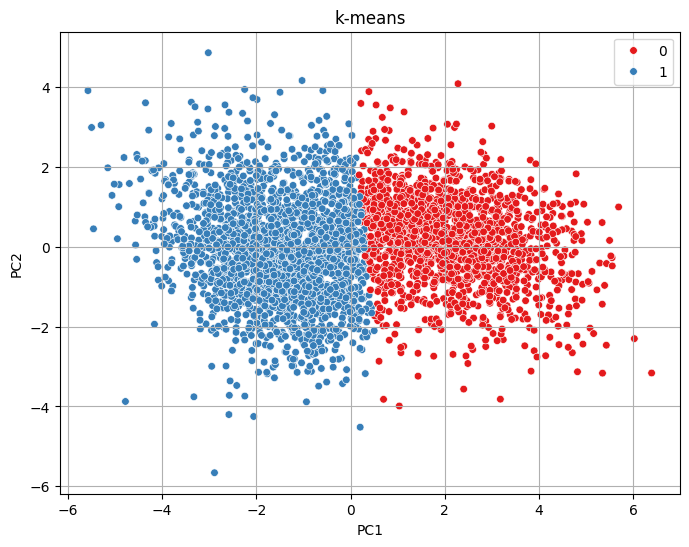

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=clusters_km,
    palette='Set1',
    s=30
)
plt.title("k-means")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [ ]:
print("УСТОЙЧИВОСТЬ ПО ЧИСЛУ КЛАСТЕРОВ\n")

scores = {}
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    scores[k] = silhouette_score(X_scaled, labels)
    print(f"k = {k}, silhouette = {scores[k]:.4f}")


УСТОЙЧИВОСТЬ ПО ЧИСЛУ КЛАСТЕРОВ

k = 2, silhouette = 0.4100
k = 3, silhouette = 0.2737
k = 4, silhouette = 0.2717
k = 5, silhouette = 0.2635


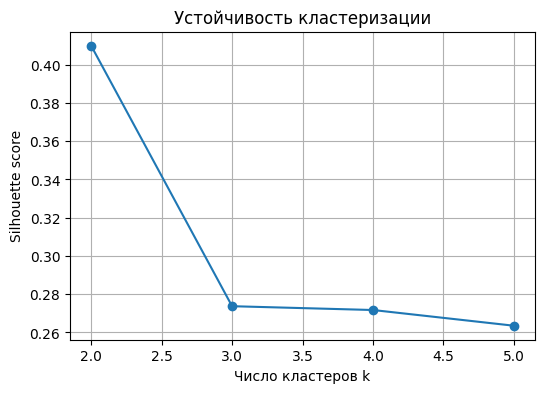

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(scores.keys(), scores.values(), marker='o')
plt.xlabel("Число кластеров k")
plt.ylabel("Silhouette score")
plt.title("Устойчивость кластеризации")
plt.grid(True)
plt.show()






In [ ]:
agg = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward'
)

clusters_agg = agg.fit_predict(X_scaled)
sil_agg = silhouette_score(X_scaled, clusters_agg)

print(f"Silhouette score (Agglomerative clustering): {sil_agg:.4f}")


Silhouette score (Agglomerative clustering): 0.3955


In [ ]:
print("СРЕДНИЕ ЗНАЧЕНИЯ ПРИЗНАКОВ ПО КЛАСТЕРАМ\n")
cluster_description = data.drop(columns=['Class']).groupby('Cluster').mean()
cluster_description

СРЕДНИЕ ЗНАЧЕНИЯ ПРИЗНАКОВ ПО КЛАСТЕРАМ



,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Cluster,,,,,,,
0,14360.022208,490.528807,206.497197,89.623837,0.899979,14694.571701,0.650281
1,11473.879588,428.638262,176.274764,83.978613,0.877623,11723.530886,0.670155


In [ ]:
print("""
ВЫВОДЫ:

1. Данные содержат 7 морфологических признаков зёрен риса без пропусков.
2. Метод k-means с евклидовой метрикой выбран обоснованно.
3. Кластеризация выявила два устойчивых кластера.
4. Кластеры хорошо соответствуют сортам Cammeo и Osmancik.
5. Изменение числа кластеров и метода не приводит к резкому ухудшению качества.
6. Основные различия связаны с площадью, длиной осей и формой зерна.

Кластерный анализ подтвердил наличие естественной структуры в данных.
""")



ВЫВОДЫ:

1. Данные содержат 7 морфологических признаков зёрен риса без пропусков.
2. Метод k-means с евклидовой метрикой выбран обоснованно.
3. Кластеризация выявила два устойчивых кластера.
4. Кластеры хорошо соответствуют сортам Cammeo и Osmancik.
5. Изменение числа кластеров и метода не приводит к резкому ухудшению качества.
6. Основные различия связаны с площадью, длиной осей и формой зерна.

Кластерный анализ подтвердил наличие естественной структуры в данных.



In [ ]:
from sklearn.metrics import adjusted_rand_score

# Сравним результаты k-means при разных инициализациях
labels1 = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42).fit_predict(X_scaled)
labels2 = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=0).fit_predict(X_scaled)
labels3 = KMeans(n_clusters=2, init='random', n_init=10, random_state=42).fit_predict(X_scaled)

# ARI — мера совпадения кластеров (1.0 = идеально совпадает)
ari_1_2 = adjusted_rand_score(labels1, labels2)
ari_1_3 = adjusted_rand_score(labels1, labels3)

print(f"ARI labels1 vs labels2: {ari_1_2:.4f}")
print(f"ARI labels1 vs labels3: {ari_1_3:.4f}")

ARI labels1 vs labels2: 1.0000
ARI labels1 vs labels3: 1.0000


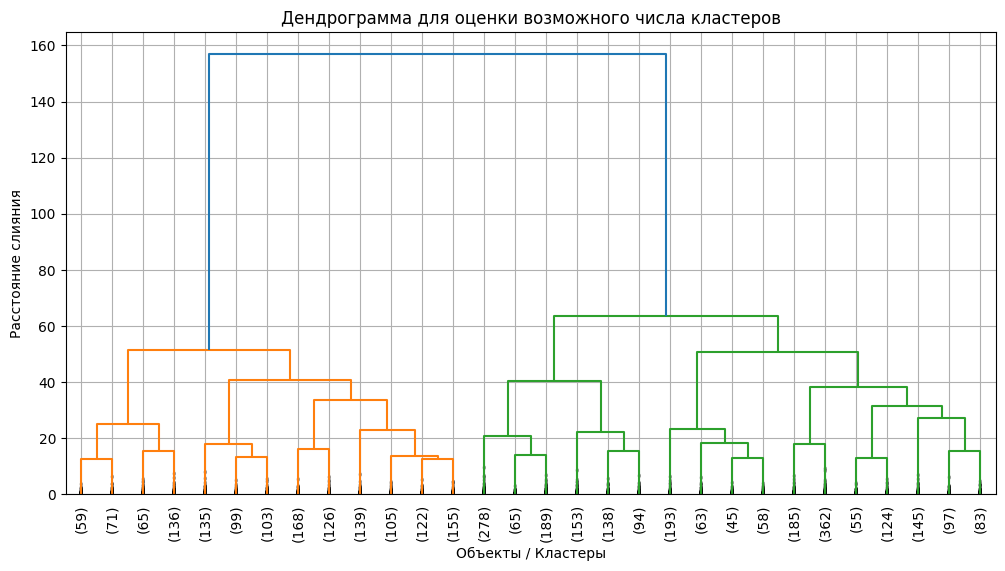

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Стандартизируем данные (важно для иерархической кластеризации)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Вычисляем linkage (связь между кластерами)
# метод 'ward' минимизирует внутрикластерную дисперсию
linkage_matrix = sch.linkage(X_scaled, method='ward')

# Строим дендрограмму
plt.figure(figsize=(12, 6))
dendro = sch.dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # показываем последние p слияний для наглядности
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True
)

plt.title("Дендрограмма для оценки возможного числа кластеров")
plt.xlabel("Объекты / Кластеры")
plt.ylabel("Расстояние слияния")
plt.grid(True)
plt.show()


Данные загружены:
(3810, 7) (3810,)
Class
1    2180
0    1630
Name: count, dtype: int64

Доля объяснённой дисперсии первых двух компонент: 0.8684


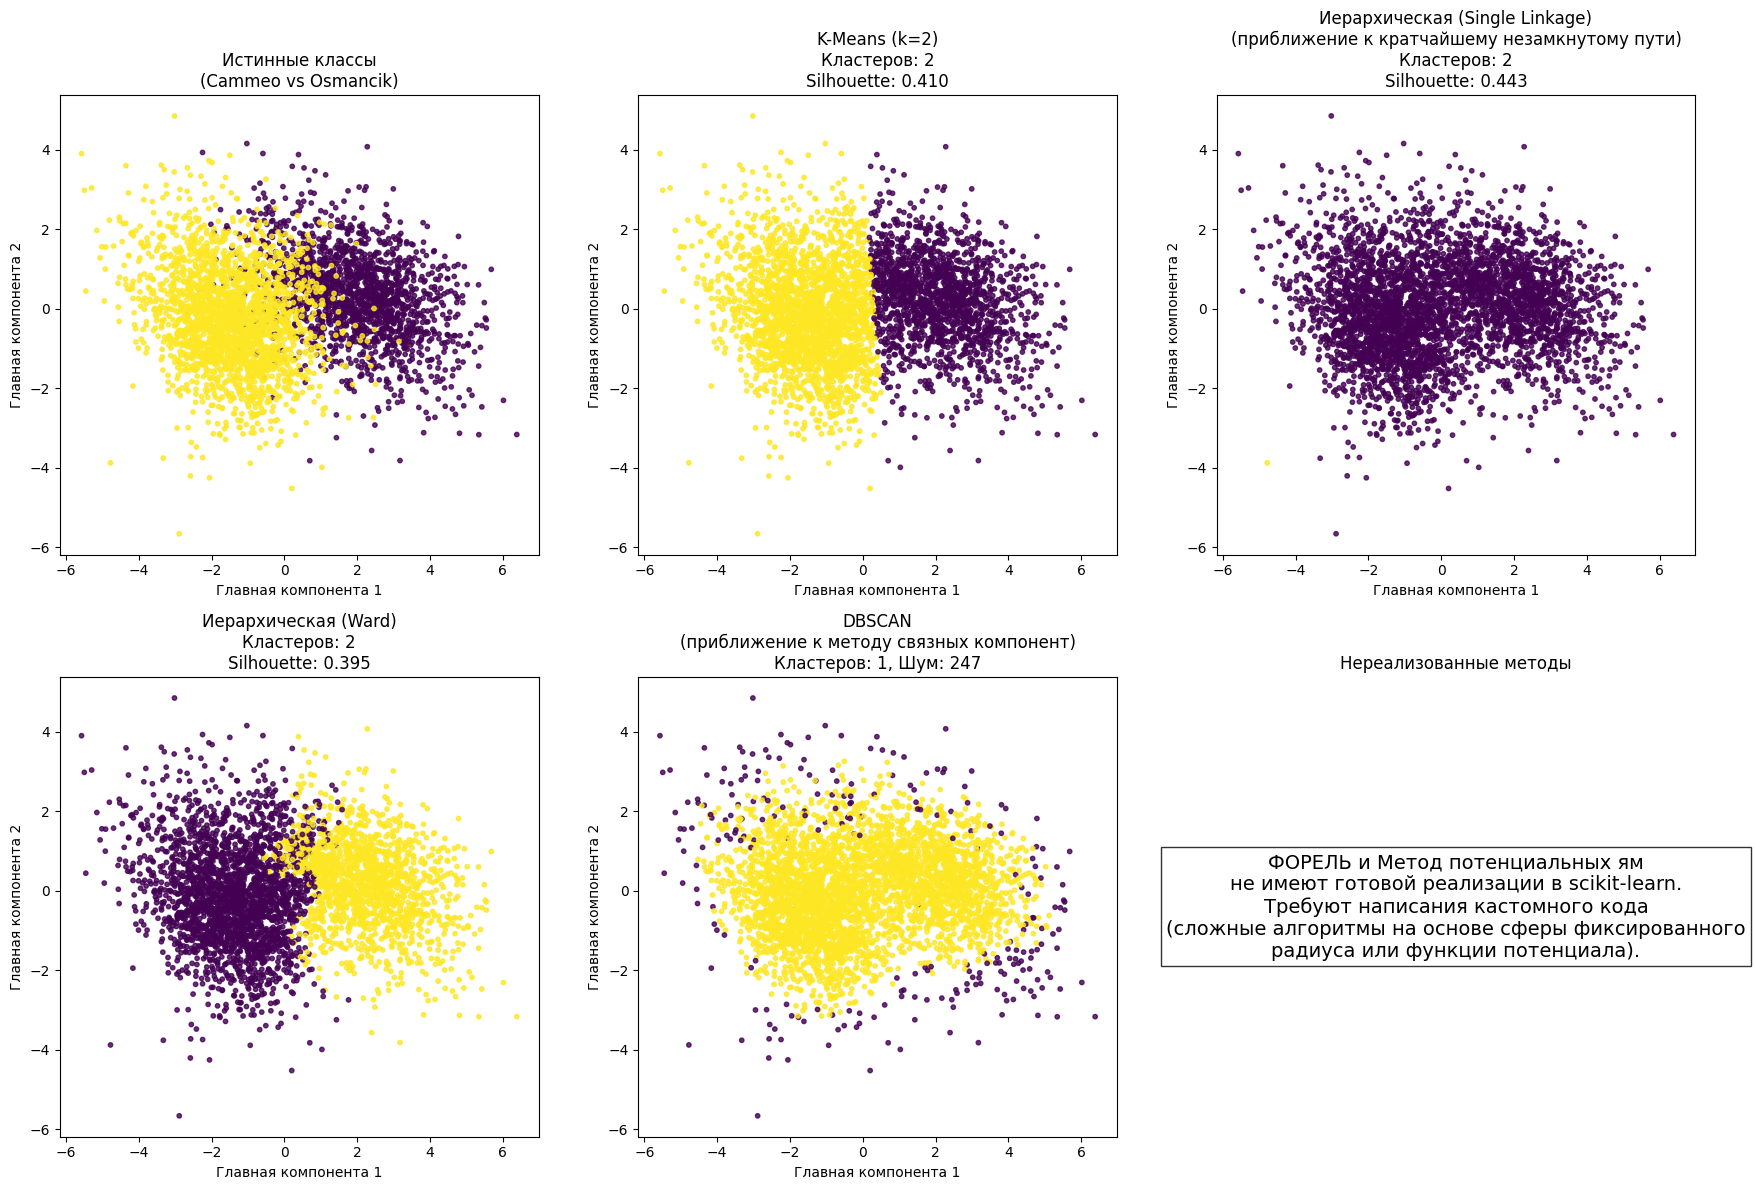

In [ ]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# === Ваш вариант загрузки данных ===
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets['Class'].map({'Cammeo': 0, 'Osmancik': 1})  # для визуализации истинных классов

print("Данные загружены:")
print(X.shape, y.shape)
print(y.value_counts())

# === Предобработка ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nДоля объяснённой дисперсии первых двух компонент: {pca.explained_variance_ratio_.sum():.4f}")

# === Методы кластеризации ===
clustering_methods = {
    'K-Means (k=2)': KMeans(n_clusters=2, random_state=42, n_init='auto'),
    'Иерархическая (Single Linkage)\n(приближение к кратчайшему незамкнутому пути)':
        AgglomerativeClustering(n_clusters=2, linkage='single'),
    'Иерархическая (Ward)': AgglomerativeClustering(n_clusters=2, linkage='ward'),
    'DBSCAN\n(приближение к методу связных компонент)': DBSCAN(eps=0.6, min_samples=10),  # eps можно подтюнить
}

# === Визуализация ===
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()

# 1. Истинные классы
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10, alpha=0.8)
axs[0].set_title('Истинные классы\n(Cammeo vs Osmancik)')
axs[0].set_xlabel('Главная компонента 1')
axs[0].set_ylabel('Главная компонента 2')

# Кластеризация методами
for idx, (name, model) in enumerate(clustering_methods.items(), start=1):
    # Предсказание меток
    if 'DBSCAN' in name:
        labels = model.fit_predict(X_scaled)
    else:
        labels = model.fit_predict(X_scaled) if hasattr(model, 'fit_predict') else model.fit(X_scaled).labels_

    # Метрики
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1) if -1 in labels else 0
    sil = silhouette_score(X_scaled, labels) if n_clusters > 1 else None

    # График
    scatter = axs[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10, alpha=0.8)
    title = f'{name}\nКластеров: {n_clusters}'
    if n_noise > 0:
        title += f', Шум: {n_noise}'
    if sil is not None:
        title += f'\nSilhouette: {sil:.3f}'
    axs[idx].set_title(title)
    axs[idx].set_xlabel('Главная компонента 1')
    axs[idx].set_ylabel('Главная компонента 2')

# Заглушка для методов без стандартной реализации
axs[5].text(0.5, 0.5,
            'ФОРЕЛЬ и Метод потенциальных ям\n'
            'не имеют готовой реализации в scikit-learn.\n'
            'Требуют написания кастомного кода\n'
            '(сложные алгоритмы на основе сферы фиксированного\n'
            'радиуса или функции потенциала).',
            ha='center', va='center', transform=axs[5].transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.8))
axs[5].set_title('Нереализованные методы')
axs[5].axis('off')

plt.tight_layout()
plt.show()